In [1]:
import numpy as np 
import pandas as pd 
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

In [5]:
DIR_WORKSPACE = '/node200data/18parkky/datasets'

In [3]:
dict_PatientID_to_MSI_class = {'SC044': 'MSI-H',
                                'P04': 'MSI-H',
                                'P21': 'MSI-H',
                                'P23': 'MSI-H',
                                'CRC2783': 'MSI-I',
                                'SC035': 'MSI-I',
                                'P15': 'MSI-I',
                                'P19': 'MSI-I',
                                'P20': 'MSI-I',
                                'P22': 'MSI-I',
                                'P26': 'MSI-I',
                                'CRC2817': 'MSI-L',
                                'P17': 'MSI-L',
                                'P18': 'MSI-L'}

In [6]:
f'{DIR_WORKSPACE}/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad'

'/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad'

In [ ]:
# /Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/AllPatients/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad

In [16]:
adata_chen      = sc.read_h5ad(f'{DIR_WORKSPACE}/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/2_cell_type_labeled_h5ad/Chen.MSI.preprocessed.NanoMnT.ManualAnnot.h5ad')
adata_joanito   = sc.read_h5ad(f'{DIR_WORKSPACE}/data/public/processed_data/Joanito_et_al/2_cell_type_labeled_h5ad/Joanito.preprocessed.NanoMnT.ManualAnnot.h5ad')

adata_epi_chen      = adata_chen[adata_chen.obs['Manual_CellType_lvl_1']!='N/A'].copy()
adata_epi_joanito   = adata_joanito[adata_joanito.obs['Manual_CellType_lvl_1']!='N/A'].copy()

adata_epi_joanito   = adata_epi_joanito.raw.to_adata()
adata_epi_chen      = adata_epi_chen.raw.to_adata()

In [18]:
chen_patient_order_by_MSI_intensity     = ['P18', 'P17', 'P15', 'P26', 'P20', 'P19', 'P22', 'P23', 'P21', 'P04']
joanito_patient_order_by_MSI_intensity  = ['CRC2817', 'CRC2783', 'SC035', 'SC044']

In [22]:
adata_epi_chen_tumor = adata_epi_chen[(adata_epi_chen.obs['PatientID'].isin(chen_patient_order_by_MSI_intensity)) & 
                                      (adata_epi_chen.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].copy()
# adata_epi_joanito_tumor = adata_epi_joanito[(adata_epi_joanito.obs['PatientID'].isin(joanito_patient_order_by_MSI_intensity)) & 
#                                             (adata_epi_joanito.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].copy()

adata_epi_joanito_tumor = adata_epi_joanito[(adata_epi_joanito.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].copy()

adata_epi_joanito_tumor.raw = adata_epi_joanito_tumor
adata_epi_joanito_tumor.var["mt"] = adata_epi_joanito_tumor.var_names.str.startswith("MT-")
adata_epi_joanito_tumor.var["ribo"] = adata_epi_joanito_tumor.var_names.str.startswith(("RPS", "RPL"))
adata_epi_joanito_tumor.var["hb"] = adata_epi_joanito_tumor.var_names.str.contains("^HB[^(P)]")
adata_epi_joanito_tumor = adata_epi_joanito_tumor[:, adata_epi_joanito_tumor.var.mt==False].copy()
adata_epi_joanito_tumor = adata_epi_joanito_tumor[:, adata_epi_joanito_tumor.var.ribo==False].copy()
adata_epi_joanito_tumor = adata_epi_joanito_tumor[:, adata_epi_joanito_tumor.var.hb==False].copy()

adata_epi_chen_tumor.raw = adata_epi_chen_tumor
adata_epi_chen_tumor.var["mt"] = adata_epi_chen_tumor.var_names.str.startswith("MT-")
adata_epi_chen_tumor.var["ribo"] = adata_epi_chen_tumor.var_names.str.startswith(("RPS", "RPL"))
adata_epi_chen_tumor.var["hb"] = adata_epi_chen_tumor.var_names.str.contains("^HB[^(P)]")
adata_epi_chen_tumor = adata_epi_chen_tumor[:, adata_epi_chen_tumor.var.mt==False].copy()
adata_epi_chen_tumor = adata_epi_chen_tumor[:, adata_epi_chen_tumor.var.ribo==False].copy()
adata_epi_chen_tumor = adata_epi_chen_tumor[:, adata_epi_chen_tumor.var.hb==False].copy()

In [25]:
joanito_MSS_patients = ['CRC2786', 'CRC2787', 'CRC2801', 'CRC2821', 'SC040', 'SC041']

<Axes: xlabel='count', ylabel='PatientID'>

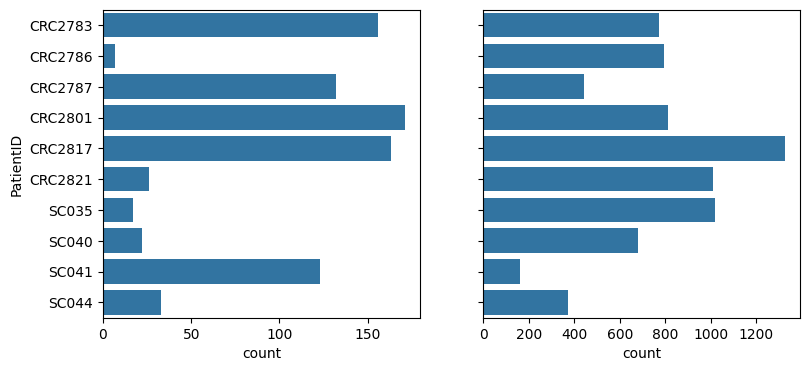

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
sns.countplot(data=adata_epi_joanito[(adata_epi_joanito.obs['Manual_CellType_lvl_1']!='Tumor epithelial')].obs, y='PatientID',ax=axes[0])
sns.countplot(data=adata_epi_joanito[(adata_epi_joanito.obs['Manual_CellType_lvl_1']=='Tumor epithelial')].obs, y='PatientID',ax=axes[1])

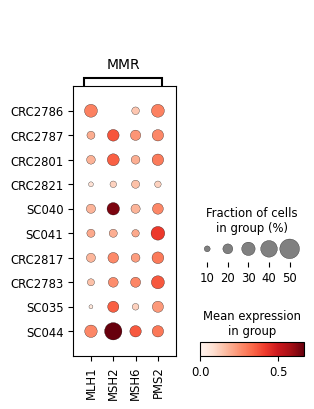

In [34]:
sc.pl.dotplot(adata_epi_joanito[(adata_epi_joanito.obs['Manual_CellType_lvl_1']!='Tumor epithelial')], var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6', 'PMS2'], 
                                                #   'Methylation' : ['DNMT3A', 'DNMT3B', 'DNMT1', 'UHRF1'],
                                                  }, 
              groupby='PatientID', 
              categories_order=joanito_MSS_patients+joanito_patient_order_by_MSI_intensity,
              )

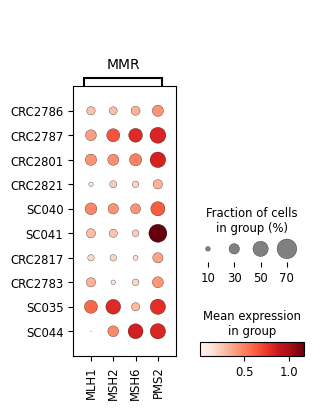

In [33]:
sc.pl.dotplot(adata_epi_joanito_tumor, var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6', 'PMS2'], 
                                                #   'Methylation' : ['DNMT3A', 'DNMT3B', 'DNMT1', 'UHRF1'],
                                                  }, 
              groupby='PatientID', 
              categories_order=joanito_MSS_patients+joanito_patient_order_by_MSI_intensity,
              )

In [28]:
sc.pp.normalize_total(adata_epi_joanito_tumor)
sc.pp.log1p(adata_epi_joanito_tumor)

In [29]:
sc.pp.normalize_total(adata_epi_chen_tumor)
sc.pp.log1p(adata_epi_chen_tumor)

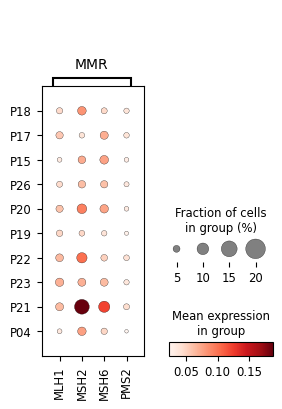

In [39]:
sc.pl.dotplot(adata_epi_chen[(adata_epi_chen.obs['Manual_CellType_lvl_1']!='Tumor epithelial')], var_names={'MMR' : ['MLH1', 'MSH2', 'MSH6', 'PMS2'], 
                                                #   'Methylation' : ['DNMT3A', 'DNMT3B', 'DNMT1', 'UHRF1'],
                                                  }, 
              groupby='PatientID', 
              categories_order=chen_patient_order_by_MSI_intensity,
              )

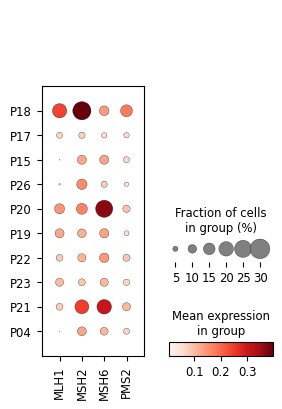

In [38]:
sc.pl.dotplot(adata_epi_chen_tumor, var_names=['MLH1', 'MSH2', 'MSH6', 'PMS2'],  groupby='PatientID', categories_order=chen_patient_order_by_MSI_intensity)

In [ ]:
sc.pl.dotplot(adata_epi_joanito_tumor, var_names=['MLH1', 'MSH2', 'MSH6', 'PMS2'], groupby='PatientID', categories_order=joanito_patient_order_by_MSI_intensity)